# Lab 4.2 - scipy and random numbers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

Requirements:
- Create a reproducible data set of random numbers
- Find the number of elements, min, max, variance, skew, and kurtosis
- Explain what the skew and kurtosis mean. Is it skewed left? right? Does the kurtosis mean the distribution is flatter? more peaked?
- Reproducibility: have a partner generate the same set of random numbers you did. Do they get the same results?
- Plot your random numbers

Bonus:
- Do your random numbers follow a normal distribution? If not, how would you create simulated normal distribution?

In [51]:
import pandas as pd
seed = 131078
si = 100000
df = pd.DataFrame([stats.norm.rvs(size=3,random_state=seed) for _ in range(5)],columns=['A','B','C'])
df
s = pd.Series(stats.norm.rvs(size = si,random_state=seed))
s2 = pd.Series(stats.binom.rvs(n=1,p=.5,size=si,random_state=seed))

print(stats.describe(s))
print(stats.describe(s2))

DescribeResult(nobs=100000, minmax=(-4.613822653634287, 4.2564388358715979), mean=-0.0022188868217770958, variance=0.99610220478829326, skewness=0.004801681693955422, kurtosis=-0.0028322879906421683)
DescribeResult(nobs=100000, minmax=(0, 1), mean=0.49861, variance=0.25000056790567898, skewness=0.005560021485076559, kurtosis=-1.9999690861610853)


In [29]:
from scipy.stats import skew
skew = skew(s)
print(skew)
# Kurtosis
# If plot is short, making it platykurtic (values distributed widely)
# If plot is tall, and is leptokurtic (all values around one common value)
# If plot is in between, and is mesokurtic
from scipy.stats import kurtosis
kurt = kurtosis(s)
print(kurt)

-0.00398131484838
0.00491689519317


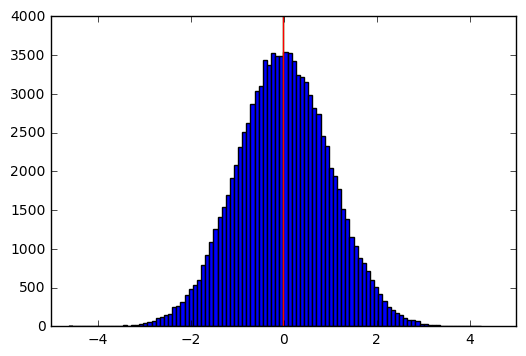

In [37]:
plt.hist(s,bins=100)
plt.axvline(s.mean(),color="g")
plt.axvline(s.median(),color="r")
plt.show()

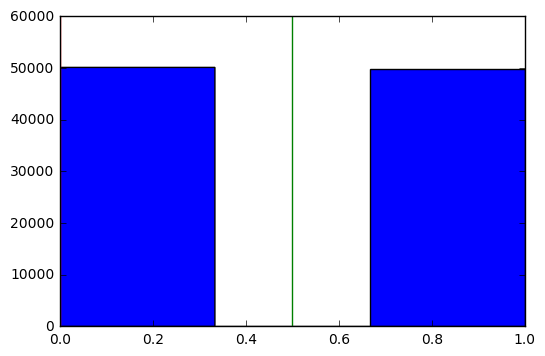

In [55]:
plt.hist(s2,bins=3)
plt.axvline(s2.mean(),color="g")
plt.axvline(s2.median(),color="r")
plt.show()

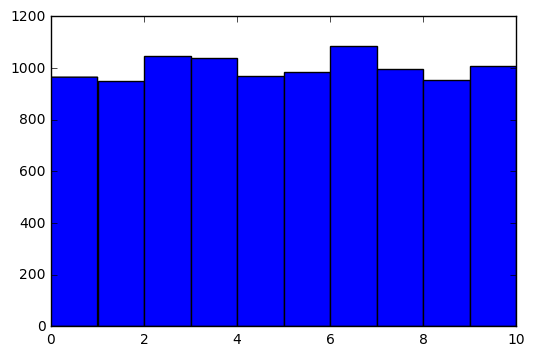

In [129]:
# Random numbers generator
import datetime as dt
def random_gen(max=1,size=1,seed=42):
    out = []
    for i in range(size):
        today = dt.datetime.now()
        nb = np.log((today.year+today.month+today.second+i)*seed + today.second*today.day)
        res = (nb*10**9 - np.floor(nb*10**9))*max
        out.append(res)
    return(out)
    
res = random_gen(size=10000,max=10)
plt.hist(res)
plt.show()